In [1]:
 # Data Science Libs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pickle

# model preprocessing & metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from imblearn.over_sampling import SMOTE

# algorithm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [2]:
df = pd.read_csv("resources/wine-quality-white-and-red.csv")
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
df["is_white"] = pd.get_dummies(df.type, drop_first=True)

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_white
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [5]:
df = df.drop(["type"], axis=1)

<AxesSubplot:>

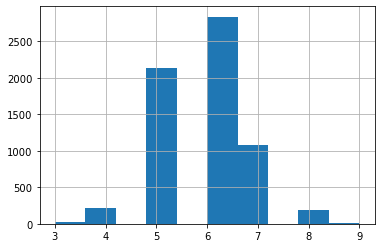

In [6]:
df["quality"].hist()

In [7]:
df["binary_quality"] = df["quality"] >=6
df.head(20)  

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_white,binary_quality
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1,True
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1,True
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1,True
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1,True
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1,True
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1,True
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,1,True
7,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1,True
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1,True
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,1,True


In [8]:
df = df.drop(["quality"], axis=1)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_white,binary_quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1,True
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1,True
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1,True
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,True
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,True


In [9]:
df.binary_quality.value_counts()

True     4113
False    2384
Name: binary_quality, dtype: int64

In [10]:
df.binary_quality.describe()

count     6497
unique       2
top       True
freq      4113
Name: binary_quality, dtype: object

In [11]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'is_white', 'binary_quality'],
      dtype='object')

In [12]:
df3 = df.copy()

In [13]:
cols = ['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


for col in cols:
    df3[col], cut_bin = pd.qcut(df3[col], q = 4, labels = [1, 2, 3, 4], retbins = True)

df3.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_white,binary_quality
0,2,2,3,4,2,4,4,4,1,2,1,1,True
1,1,3,3,1,3,1,3,2,3,2,1,1,True
2,4,2,4,3,3,3,2,3,3,2,2,1,True
3,3,1,3,4,3,4,4,3,2,1,2,1,True
4,3,1,3,4,3,4,4,3,2,1,2,1,True
5,4,2,4,3,3,3,2,3,3,2,2,1,True
6,1,3,1,3,2,3,3,3,2,2,2,1,True
7,2,2,3,4,2,4,4,4,1,2,1,1,True
8,1,3,3,1,3,1,3,2,3,2,1,1,True
9,4,1,4,1,2,2,3,2,3,2,3,1,True


In [14]:
cols = ['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
df2 = df.copy()

for col in cols:
    print(col)
    print(df3[col].value_counts())
    print()
    
    
#     cd = df[col].value_counts()
#     for i in cd.index:
#         val = cd[i]
#         if val < 5:
#             mask = df[col] == i
#             df2[col][mask] = "Other"
            
            
            
#     print(df2[col].value_counts())
    print()
    

fixed acidity
2    1749
1    1721
4    1519
3    1508
Name: fixed acidity, dtype: int64


volatile acidity
1    1801
4    1619
3    1592
2    1485
Name: volatile acidity, dtype: int64


citric acid
1    1777
2    1605
4    1604
3    1511
Name: citric acid, dtype: int64


residual sugar
1    1704
3    1621
4    1607
2    1565
Name: residual sugar, dtype: int64


chlorides
1    1729
4    1607
3    1598
2    1563
Name: chlorides, dtype: int64


free sulfur dioxide
1    1715
2    1677
4    1608
3    1497
Name: free sulfur dioxide, dtype: int64


total sulfur dioxide
3    1645
2    1642
1    1625
4    1585
Name: total sulfur dioxide, dtype: int64


density
1    1628
2    1625
3    1622
4    1622
Name: density, dtype: int64


pH
1    1718
2    1643
4    1574
3    1562
Name: pH, dtype: int64


sulphates
2    1703
1    1689
3    1554
4    1551
Name: sulphates, dtype: int64


alcohol
1    1872
3    1629
4    1573
2    1423
Name: alcohol, dtype: int64




                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.219008     0.324436   
volatile acidity           0.219008          1.000000    -0.377981   
citric acid                0.324436         -0.377981     1.000000   
residual sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free sulfur dioxide       -0.282735         -0.352557     0.133126   
total sulfur dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   
is_white                  -0.486740         -0.653036     0.187397   
binary_quality            -0.067354         -0.267046     0.075739   

                   

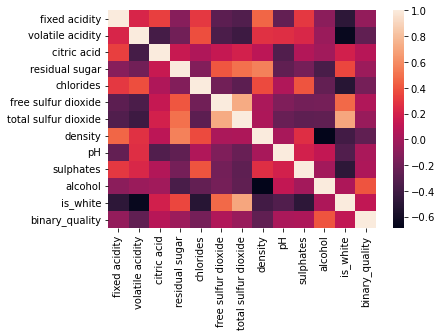

In [15]:
# check correlations
corrs = df.corr()
print(corrs)
print()
sns.heatmap(corrs)
plt.show()

In [16]:
 abs(df.corr()["binary_quality"]).sort_values(ascending=False)

binary_quality          1.000000
alcohol                 0.394676
density                 0.268876
volatile acidity        0.267046
chlorides               0.181908
is_white                0.116595
citric acid             0.075739
fixed acidity           0.067354
total sulfur dioxide    0.047585
free sulfur dioxide     0.044819
sulphates               0.035807
residual sugar          0.032484
pH                      0.018842
Name: binary_quality, dtype: float64

In [17]:
features = ['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
X = df.loc[:, features].values
y = df.loc[:, ["binary_quality"]].values.ravel()

# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # use stratify for classification models
print(f"{round(len(X_train)/len(X), 3)} : {round(len(X_test)/len(X), 3)}")

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

0.8 : 0.2


In [18]:
def evaluateModel(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train) # fit
    
    train_preds = model.predict(X_train) # predict
    test_preds = model.predict(X_test)
    test_proba = model.predict_proba(X_test)
    
    output_train = f"""
    METRICS FOR THE TRAINING SET:
    ----------------------------
    {confusion_matrix(y_train, train_preds)}

    {classification_report(y_train, train_preds)}
    """
    print(output_train)

    #################################################

    output_test = f"""
    METRICS FOR THE TESTING SET:
    ----------------------------
    {confusion_matrix(y_test, test_preds)}

    {classification_report(y_test, test_preds)}
    """
    print(output_test)
    print()
    
    #################################################
    
    fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, test_proba[:,1])

    roc_auc_knn = auc(fpr_knn, tpr_knn)
    print(f"AUC for the Model Test Set: {roc_auc_knn}")

    # make plot
    plt.figure(figsize=(10,6))
    plt.plot(fpr_knn, tpr_knn, color='darkorange')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    
    print("Brier Score:")
    print(sum((y_test - test_proba[:,1])**2))


    METRICS FOR THE TRAINING SET:
    ----------------------------
    [[2488  802]
 [ 905 2385]]

                  precision    recall  f1-score   support

       False       0.73      0.76      0.74      3290
        True       0.75      0.72      0.74      3290

    accuracy                           0.74      6580
   macro avg       0.74      0.74      0.74      6580
weighted avg       0.74      0.74      0.74      6580

    

    METRICS FOR THE TESTING SET:
    ----------------------------
    [[610 213]
 [219 604]]

                  precision    recall  f1-score   support

       False       0.74      0.74      0.74       823
        True       0.74      0.73      0.74       823

    accuracy                           0.74      1646
   macro avg       0.74      0.74      0.74      1646
weighted avg       0.74      0.74      0.74      1646

    

AUC for the Model Test Set: 0.8108939673334524


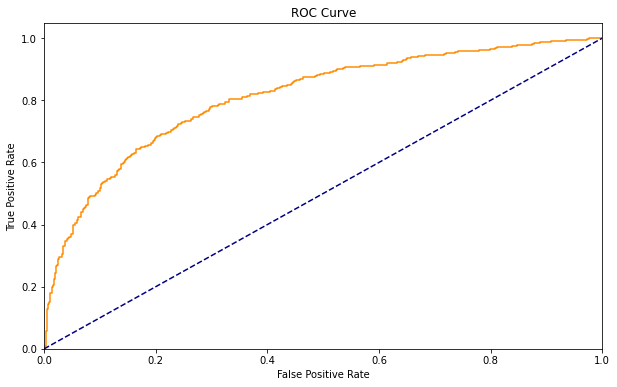

Brier Score:
291.6926704743576


In [19]:
lr = LogisticRegression(max_iter=30000)

evaluateModel(lr, X_train, X_test, y_train, y_test)


    METRICS FOR THE TRAINING SET:
    ----------------------------
    [[2709  581]
 [ 764 2526]]

                  precision    recall  f1-score   support

       False       0.78      0.82      0.80      3290
        True       0.81      0.77      0.79      3290

    accuracy                           0.80      6580
   macro avg       0.80      0.80      0.80      6580
weighted avg       0.80      0.80      0.80      6580

    

    METRICS FOR THE TESTING SET:
    ----------------------------
    [[659 164]
 [215 608]]

                  precision    recall  f1-score   support

       False       0.75      0.80      0.78       823
        True       0.79      0.74      0.76       823

    accuracy                           0.77      1646
   macro avg       0.77      0.77      0.77      1646
weighted avg       0.77      0.77      0.77      1646

    

AUC for the Model Test Set: 0.8443363564825956


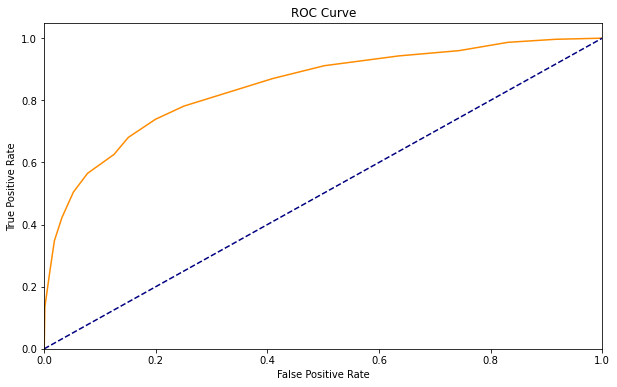

Brier Score:
263.1245674740488


In [20]:
knn_model = KNeighborsClassifier(n_neighbors=17)

evaluateModel(knn_model, X_train, X_test, y_train, y_test)


    METRICS FOR THE TRAINING SET:
    ----------------------------
    [[2777  513]
 [ 984 2306]]

                  precision    recall  f1-score   support

       False       0.74      0.84      0.79      3290
        True       0.82      0.70      0.75      3290

    accuracy                           0.77      6580
   macro avg       0.78      0.77      0.77      6580
weighted avg       0.78      0.77      0.77      6580

    

    METRICS FOR THE TESTING SET:
    ----------------------------
    [[675 148]
 [256 567]]

                  precision    recall  f1-score   support

       False       0.73      0.82      0.77       823
        True       0.79      0.69      0.74       823

    accuracy                           0.75      1646
   macro avg       0.76      0.75      0.75      1646
weighted avg       0.76      0.75      0.75      1646

    

AUC for the Model Test Set: 0.8177813145458115


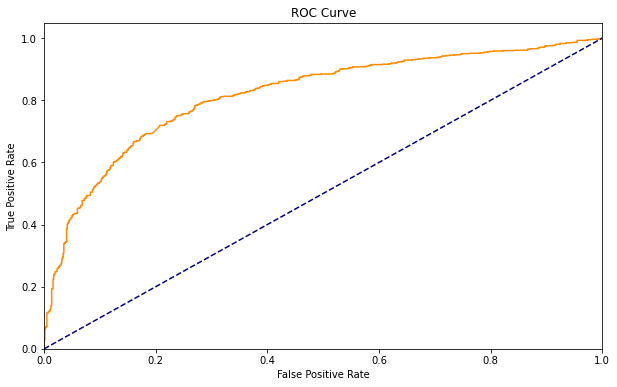

Brier Score:
292.7380798571457


In [21]:
svm_model = SVC(probability=True, kernel='poly')

evaluateModel(svm_model, X_train, X_test, y_train, y_test)


    METRICS FOR THE TRAINING SET:
    ----------------------------
    [[3290    0]
 [   0 3290]]

                  precision    recall  f1-score   support

       False       1.00      1.00      1.00      3290
        True       1.00      1.00      1.00      3290

    accuracy                           1.00      6580
   macro avg       1.00      1.00      1.00      6580
weighted avg       1.00      1.00      1.00      6580

    

    METRICS FOR THE TESTING SET:
    ----------------------------
    [[713 110]
 [136 687]]

                  precision    recall  f1-score   support

       False       0.84      0.87      0.85       823
        True       0.86      0.83      0.85       823

    accuracy                           0.85      1646
   macro avg       0.85      0.85      0.85      1646
weighted avg       0.85      0.85      0.85      1646

    

AUC for the Model Test Set: 0.9334119755687413


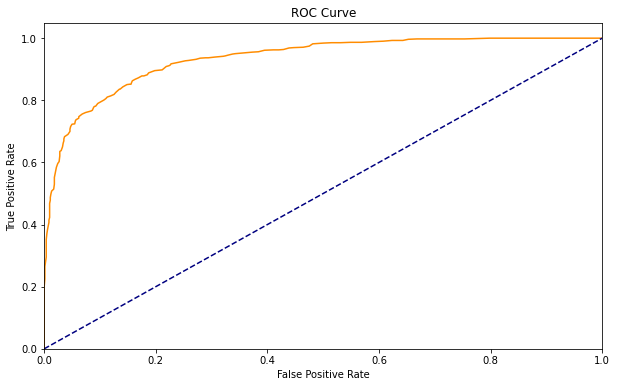

Brier Score:
175.93560000000008


In [22]:
rf = RandomForestClassifier(n_estimators=150)

evaluateModel(rf, X_train, X_test, y_train, y_test)


    METRICS FOR THE TRAINING SET:
    ----------------------------
    [[3083  207]
 [ 288 3002]]

                  precision    recall  f1-score   support

       False       0.91      0.94      0.93      3290
        True       0.94      0.91      0.92      3290

    accuracy                           0.92      6580
   macro avg       0.93      0.92      0.92      6580
weighted avg       0.93      0.92      0.92      6580

    

    METRICS FOR THE TESTING SET:
    ----------------------------
    [[687 136]
 [157 666]]

                  precision    recall  f1-score   support

       False       0.81      0.83      0.82       823
        True       0.83      0.81      0.82       823

    accuracy                           0.82      1646
   macro avg       0.82      0.82      0.82      1646
weighted avg       0.82      0.82      0.82      1646

    

AUC for the Model Test Set: 0.9094634955833871


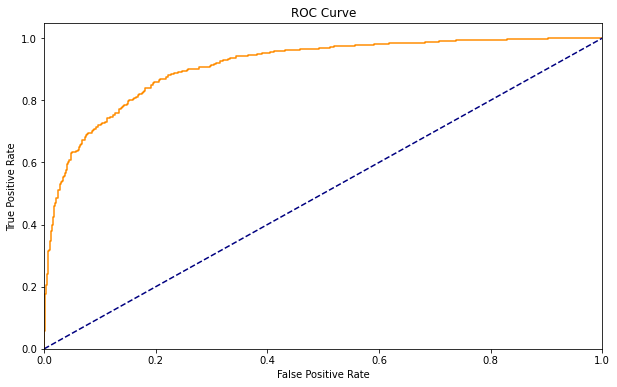

Brier Score:
200.28618545495038


In [23]:
lgb = LGBMClassifier()

evaluateModel(lgb, X_train, X_test, y_train, y_test)

In [24]:
from sklearn.ensemble import AdaBoostClassifier


    METRICS FOR THE TRAINING SET:
    ----------------------------
    [[2628  662]
 [ 822 2468]]

                  precision    recall  f1-score   support

       False       0.76      0.80      0.78      3290
        True       0.79      0.75      0.77      3290

    accuracy                           0.77      6580
   macro avg       0.78      0.77      0.77      6580
weighted avg       0.78      0.77      0.77      6580

    

    METRICS FOR THE TESTING SET:
    ----------------------------
    [[630 193]
 [230 593]]

                  precision    recall  f1-score   support

       False       0.73      0.77      0.75       823
        True       0.75      0.72      0.74       823

    accuracy                           0.74      1646
   macro avg       0.74      0.74      0.74      1646
weighted avg       0.74      0.74      0.74      1646

    

AUC for the Model Test Set: 0.8239489229015737


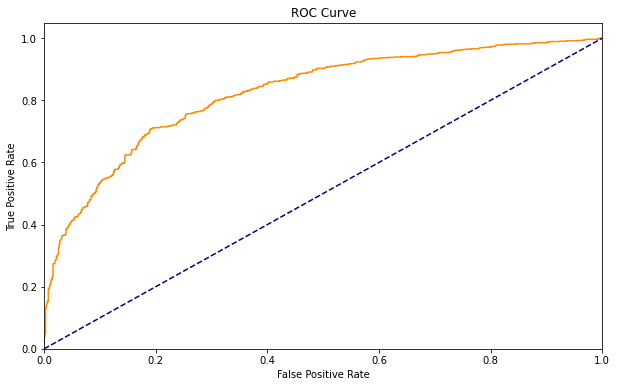

Brier Score:
403.40729832154693


In [25]:
ada = AdaBoostClassifier(random_state=42)

evaluateModel(ada, X_train, X_test, y_train, y_test)


    METRICS FOR THE TRAINING SET:
    ----------------------------
    [[3233   57]
 [  83 3207]]

                  precision    recall  f1-score   support

       False       0.97      0.98      0.98      3290
        True       0.98      0.97      0.98      3290

    accuracy                           0.98      6580
   macro avg       0.98      0.98      0.98      6580
weighted avg       0.98      0.98      0.98      6580

    

    METRICS FOR THE TESTING SET:
    ----------------------------
    [[706 117]
 [142 681]]

                  precision    recall  f1-score   support

       False       0.83      0.86      0.85       823
        True       0.85      0.83      0.84       823

    accuracy                           0.84      1646
   macro avg       0.84      0.84      0.84      1646
weighted avg       0.84      0.84      0.84      1646

    

AUC for the Model Test Set: 0.9207667175036061


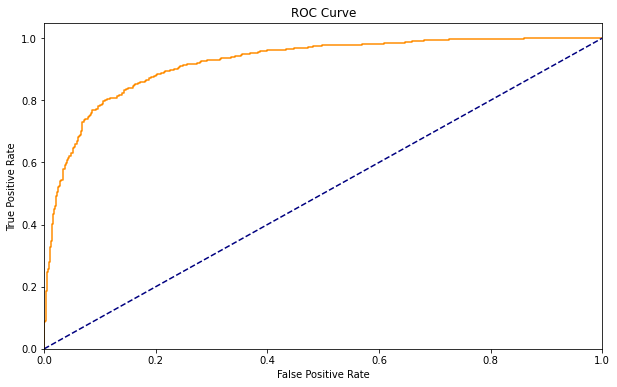

Brier Score:
184.47454200149875


In [26]:
xgb = XGBClassifier()

evaluateModel(xgb, X_train, X_test, y_train, y_test)

In [27]:
sorted(list(zip(rf.feature_importances_, features)))

[(0.06386179803803538, 'fixed acidity'),
 (0.06522730840780518, 'pH'),
 (0.06750512006741996, 'residual sugar'),
 (0.07087612095677208, 'citric acid'),
 (0.07540235950556504, 'sulphates'),
 (0.0799046776850207, 'total sulfur dioxide'),
 (0.0833797049009386, 'free sulfur dioxide'),
 (0.08774703434084442, 'chlorides'),
 (0.10803892464683888, 'density'),
 (0.12062271187523696, 'volatile acidity'),
 (0.1774342395755228, 'alcohol')]

In [28]:
# Limited Feature Test to Improve Accuracy
# features = ["alcohol", "volatile acidity", "free sulfur dioxide", "sulphates", "density", "chlorides"]
# X = df.loc[:, features].values
# y = df.loc[:, ["binary_quality"]].values.ravel()

# # transform the dataset
# oversample = SMOTE()
# X, y = oversample.fit_resample(X, y)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # use stratify for classification models
# print(f"{round(len(X_train)/len(X), 3)} : {round(len(X_test)/len(X), 3)}")

# scaler = StandardScaler().fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)


    METRICS FOR THE TRAINING SET:
    ----------------------------
    [[3233   57]
 [  83 3207]]

                  precision    recall  f1-score   support

       False       0.97      0.98      0.98      3290
        True       0.98      0.97      0.98      3290

    accuracy                           0.98      6580
   macro avg       0.98      0.98      0.98      6580
weighted avg       0.98      0.98      0.98      6580

    

    METRICS FOR THE TESTING SET:
    ----------------------------
    [[706 117]
 [142 681]]

                  precision    recall  f1-score   support

       False       0.83      0.86      0.85       823
        True       0.85      0.83      0.84       823

    accuracy                           0.84      1646
   macro avg       0.84      0.84      0.84      1646
weighted avg       0.84      0.84      0.84      1646

    

AUC for the Model Test Set: 0.9207667175036061


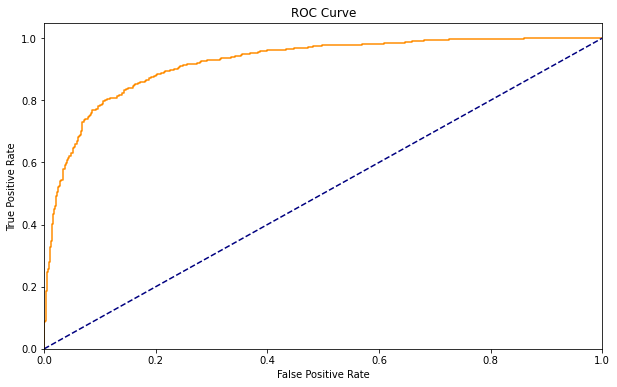

Brier Score:
184.47454200149875


In [29]:
xgb2 = XGBClassifier()

evaluateModel(xgb, X_train, X_test, y_train, y_test)


    METRICS FOR THE TRAINING SET:
    ----------------------------
    [[3290    0]
 [   0 3290]]

                  precision    recall  f1-score   support

       False       1.00      1.00      1.00      3290
        True       1.00      1.00      1.00      3290

    accuracy                           1.00      6580
   macro avg       1.00      1.00      1.00      6580
weighted avg       1.00      1.00      1.00      6580

    

    METRICS FOR THE TESTING SET:
    ----------------------------
    [[713 110]
 [130 693]]

                  precision    recall  f1-score   support

       False       0.85      0.87      0.86       823
        True       0.86      0.84      0.85       823

    accuracy                           0.85      1646
   macro avg       0.85      0.85      0.85      1646
weighted avg       0.85      0.85      0.85      1646

    

AUC for the Model Test Set: 0.934227679606218


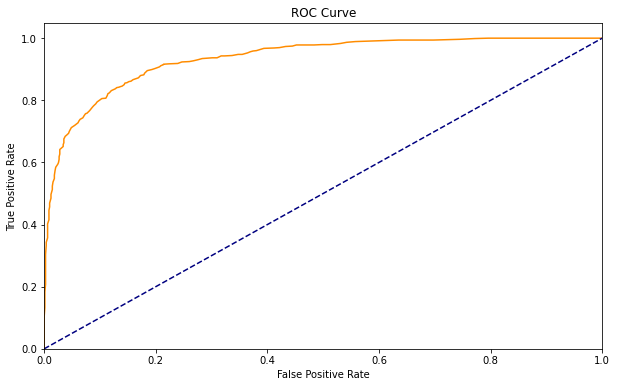

Brier Score:
174.91897777777766


In [30]:
rf2 = RandomForestClassifier()

evaluateModel(rf, X_train, X_test, y_train, y_test)


    METRICS FOR THE TRAINING SET:
    ----------------------------
    [[2488  802]
 [ 905 2385]]

                  precision    recall  f1-score   support

       False       0.73      0.76      0.74      3290
        True       0.75      0.72      0.74      3290

    accuracy                           0.74      6580
   macro avg       0.74      0.74      0.74      6580
weighted avg       0.74      0.74      0.74      6580

    

    METRICS FOR THE TESTING SET:
    ----------------------------
    [[610 213]
 [219 604]]

                  precision    recall  f1-score   support

       False       0.74      0.74      0.74       823
        True       0.74      0.73      0.74       823

    accuracy                           0.74      1646
   macro avg       0.74      0.74      0.74      1646
weighted avg       0.74      0.74      0.74      1646

    

AUC for the Model Test Set: 0.8108939673334524


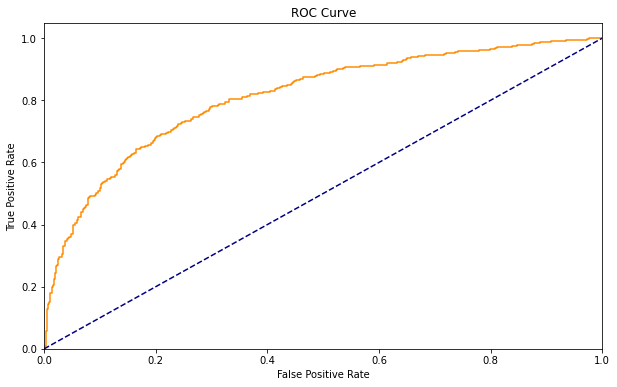

Brier Score:
291.6926704743576


In [31]:
lr2 = LogisticRegression(max_iter=30000)

evaluateModel(lr, X_train, X_test, y_train, y_test)


    METRICS FOR THE TRAINING SET:
    ----------------------------
    [[3083  207]
 [ 288 3002]]

                  precision    recall  f1-score   support

       False       0.91      0.94      0.93      3290
        True       0.94      0.91      0.92      3290

    accuracy                           0.92      6580
   macro avg       0.93      0.92      0.92      6580
weighted avg       0.93      0.92      0.92      6580

    

    METRICS FOR THE TESTING SET:
    ----------------------------
    [[687 136]
 [157 666]]

                  precision    recall  f1-score   support

       False       0.81      0.83      0.82       823
        True       0.83      0.81      0.82       823

    accuracy                           0.82      1646
   macro avg       0.82      0.82      0.82      1646
weighted avg       0.82      0.82      0.82      1646

    

AUC for the Model Test Set: 0.9094634955833871


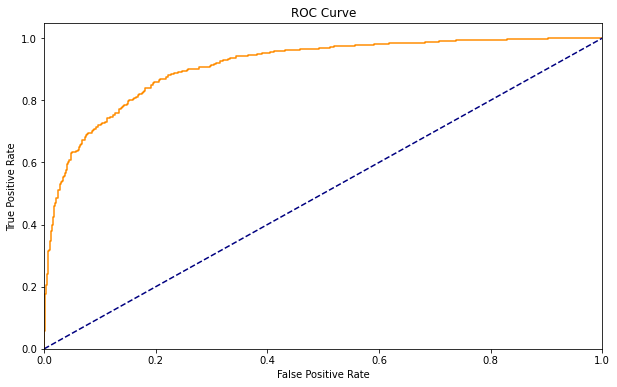

Brier Score:
200.28618545495038


In [32]:
lgb2 = LGBMClassifier()

evaluateModel(lgb, X_train, X_test, y_train, y_test)

In [33]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_white
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,1.000000


In [34]:
rf.predict([[10,1,.07,5,.05,25,115,1,3,.5,9]])

array([ True])

In [35]:
filename ='finalized_model.sav'

In [36]:
pickle.dump(rf, open(filename, 'wb'))

In [37]:
df.head(6000)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_white,binary_quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,1,True
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,1,True
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,1,True
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1,True
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,8.6,0.52,0.38,1.5,0.096,5.0,18.0,0.99666,3.20,0.52,9.4,0,False
5996,8.0,0.31,0.45,2.1,0.216,5.0,16.0,0.99358,3.15,0.81,12.5,0,True
5997,8.6,0.52,0.38,1.5,0.096,5.0,18.0,0.99666,3.20,0.52,9.4,0,False
5998,8.4,0.34,0.42,2.1,0.072,23.0,36.0,0.99392,3.11,0.78,12.4,0,True


In [38]:
df['binary_quality'] = df['binary_quality'].replace({True: 1, False: 0})

In [39]:
df.head(6000)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_white,binary_quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,1,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,1,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,8.6,0.52,0.38,1.5,0.096,5.0,18.0,0.99666,3.20,0.52,9.4,0,0
5996,8.0,0.31,0.45,2.1,0.216,5.0,16.0,0.99358,3.15,0.81,12.5,0,1
5997,8.6,0.52,0.38,1.5,0.096,5.0,18.0,0.99666,3.20,0.52,9.4,0,0
5998,8.4,0.34,0.42,2.1,0.072,23.0,36.0,0.99392,3.11,0.78,12.4,0,1


In [40]:
filename ='finalized_model.sav'

In [41]:
pickle.dump(rf, open(filename, 'wb'))